### Imports

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Loads

In [2]:
f_kappa_ece = open("results/cc18_kappa_and_ece.json")
kappa_ece = json.load(f_kappa_ece)
f_training_times = open('results/cc18_training_times.json')
train_test_times = json.load(f_training_times)

In [3]:
def plot_results_seperate_by_model(basis_df, suptitle_str = '', same_sub = False):
    colors = ['red','green','blue']
    means = {model_name : pd.DataFrame({dataset_num: {samp_size: np.mean(basis_df[model_name][dataset_num][samp_size]) 
                                                  for samp_size in basis_df[model_name][dataset_num].keys()}
                                    for dataset_num in basis_df[model_name].keys()}) for model_name in basis_df.keys()}
    if same_sub:
        fig, axs = plt.subplots()
        axs = [axs]
    else:
        fig, axs = plt.subplots(1, len(basis_df), figsize = (18,5), sharey = True, sharex = True)
    means_interpole = {}
    for count_plot_or, (model_name,df) in enumerate(means.items()):
        if same_sub:
            count_plot = 0
        else:
            count_plot = count_plot_or
            
        if not same_sub:
            color_chose = 'black'
        else:
            color_chose = colors[count_plot_or]
        
        df.index = df.index.astype(int)
        df.sort_index(inplace=True)
        interpolated =df.interpolate()
        if not same_sub:
            interpolated.plot(ax = axs[count_plot], alpha = 0.4, color = 'gray', legend =None)
            axs[count_plot].set_title(model_name)

        #axs[count_plot].set_legend('')
        if not same_sub: interpolated.mean(1).plot(ax = axs[count_plot], color = color_chose, label = model_name)
        
        if same_sub: axs[0].fill_between(interpolated.index, interpolated.quantile(0.1,1), interpolated.quantile(0.9,1), color = color_chose, alpha = 0.1)
        if same_sub: interpolated.median(1).plot(ax = axs[count_plot], color = color_chose, label = model_name)
        if same_sub: print(model_name)
        if same_sub: axs[0].legend()
        means_interpole[model_name] = (interpolated,interpolated.median(1) )
        axs[count_plot].set_xlabel('Sample Size')
        axs[count_plot].set_ylabel(suptitle_str)
    fig.suptitle(suptitle_str, fontsize = 16)
    return means, means_interpole

### plot mean training times for the 3 methods

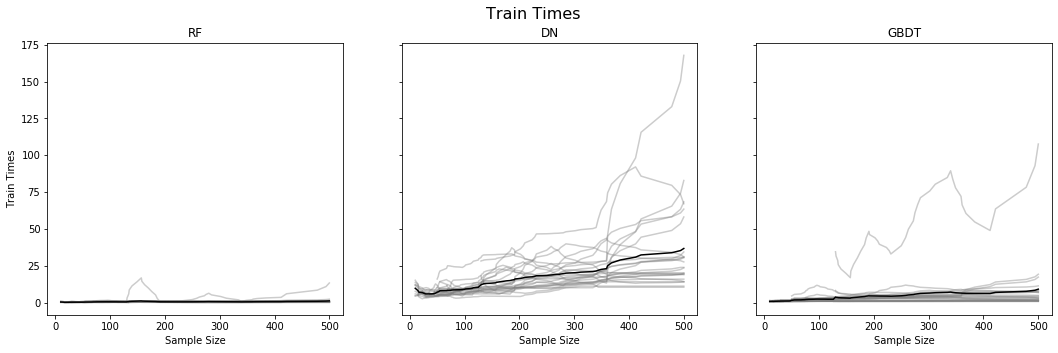

In [4]:
means_train_test, means_interpole_train_times = plot_results_seperate_by_model(train_test_times, 'Train Times')

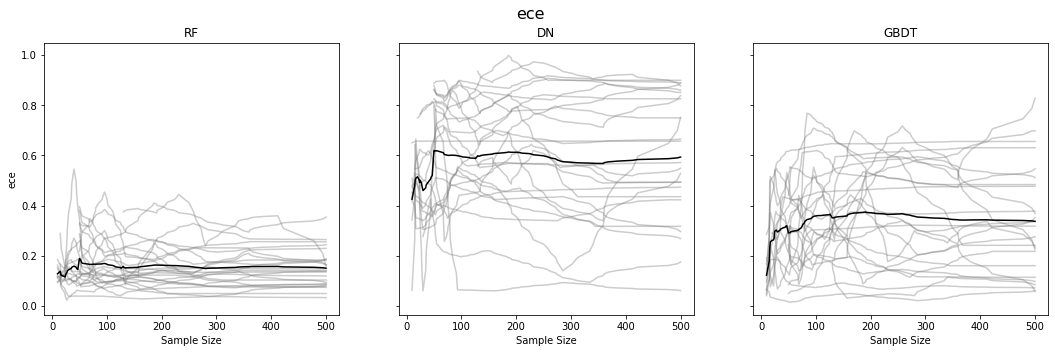

In [5]:
means_train_test, means_interpole_ece = plot_results_seperate_by_model(kappa_ece['ece'],suptitle_str = 'ece', same_sub = False)

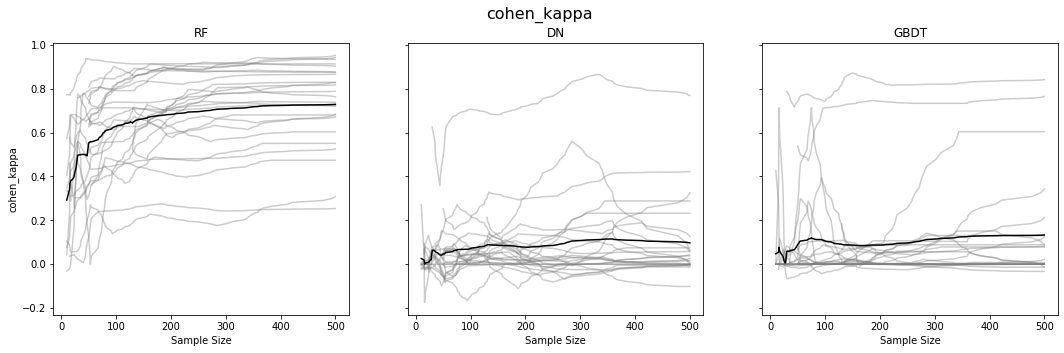

In [6]:
means_train_test, means_interpole_ece = plot_results_seperate_by_model(kappa_ece['cohen_kappa'],suptitle_str = 'cohen_kappa', same_sub = False)

### On the same bar with 90% confidence interval

RF
DN
GBDT


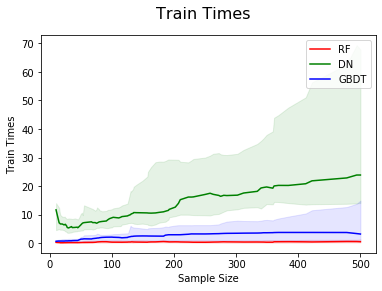

In [7]:
means_train_test = plot_results_seperate_by_model(train_test_times, 'Train Times',True)

RF
DN
GBDT


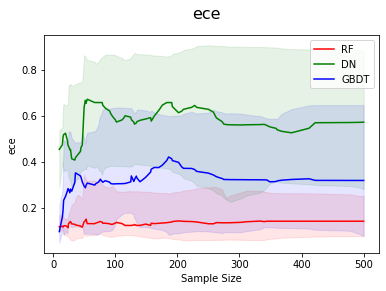

In [8]:
means_train_test = plot_results_seperate_by_model(kappa_ece['ece'], 'ece',True)

RF
DN
GBDT


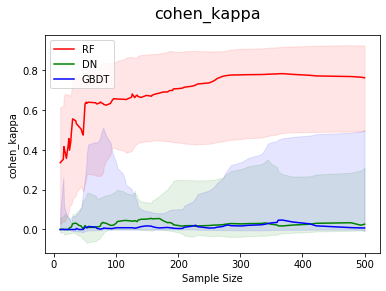

In [9]:
means_train_test = plot_results_seperate_by_model(kappa_ece['cohen_kappa'], 'cohen_kappa',True)

### Kappa vs time

In [10]:
def plot_results_seperate_by_two_model(basis_df1,basis_df2, suptitle_str = '', same_sub = False):
    colors = ['red','green','blue']
    means1 = {model_name : pd.DataFrame({dataset_num: {samp_size: np.mean(basis_df1[model_name][dataset_num][samp_size]) for samp_size in basis_df2[model_name][dataset_num].keys()} for dataset_num in basis_df[model_name].keys()}) for model_name in basis_df1.keys()}
    means2 = {model_name : pd.DataFrame({dataset_num: {samp_size: np.mean(basis_df2[model_name][dataset_num][samp_size]) for samp_size in basis_df2[model_name][dataset_num].keys()} for dataset_num in basis_df2[model_name].keys()}) for model_name in basis_df2.keys()}

    if same_sub:
        fig, axs = plt.subplots()
        axs = [axs]
    else:
        fig, axs = plt.subplots(1, len(basis_df), figsize = (18,5))
    means_interpole = {}
    for count_plot_or, (model_name,df) in enumerate(means1.items()):
        df2 = means2[model_name]
        if same_sub:
            count_plot = 0
        else:
            count_plot = count_plot_or
            
        if not same_sub:
            color_chose = 'black'
        else:
            color_chose = colors[count_plot_or]
        
        df.index = df.index.astype(int)
        df.sort_index(inplace=True)
        df2.index = df2.index.astype(int)
        df2.sort_index(inplace=True)
        interpolated =df.interpolate()
        interpolated2 =df2.interpolate()
        if not same_sub:
            for col in range(np.shape(interpolated.values)[1]):
                sorting_vals = np.argsort(interpolated.values[:,col])
                sorted1 = interpolated.values[sorting_vals,col]
                sorted2 = interpolated2.values[sorting_vals,col]
                axs[count_plot].plot(sorted1, sorted2, alpha = 0.4, color = 'gray')
            axs[count_plot].set_title(model_name)
            axs[count_plot].set_xlabel('Sample Size')
            axs[count_plot].set_ylabel(suptitle_str)
        #axs[count_plot].set_legend('')
        #print(interpolated.values.shape)
        axs[count_plot].plot(interpolated.values.mean(1), interpolated2.values.mean(1), color = color_chose, label = model_name)
        if same_sub: axs[0].legend()
        #if same_sub: axs[0].fill_between(interpolated.index, interpolated.quantile(0.1,1), interpolated.quantile(0.9,1), color = color_chose, alpha = 0.1)
        if same_sub: axs[0].fill_between(interpolated.mean(1),interpolated2.quantile(0.1,1), interpolated2.quantile(0.9,1), color = color_chose, alpha = 0.1)
           
        means_interpole[model_name] = (interpolated,interpolated.mean(1) )
    fig.suptitle(suptitle_str, fontsize = 16)
    return means1,means2, means_interpole

In [11]:
means, means2, means_interpole = plot_results_seperate_by_two_model(train_test_times,kappa_ece['ece'], suptitle_str = '', same_sub = False)

NameError: name 'basis_df' is not defined

In [12]:
means, means2, means_interpole = plot_results_seperate_by_two_model(train_test_times,kappa_ece['cohen_kappa'], suptitle_str = '', same_sub = False)

NameError: name 'basis_df' is not defined

In [13]:
means, means2, means_interpole = plot_results_seperate_by_two_model(train_test_times,kappa_ece['ece'], suptitle_str = '', same_sub = True)
plt.xlabel('Train times')
plt.ylabel('ece')

NameError: name 'basis_df' is not defined